In [1]:
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt

import urllib.request
from imageio import imsave
from tqdm import tqdm
import random
import shutil

HEIGHT = 96
WIDTH = 96
DEPTH = 3

SIZE = HEIGHT * WIDTH * DEPTH

DATA_DIR = './'

TRAIN_DATA_PATH = 'Dataset/Binary Images/stl10_binary/train_X.bin'
TRAIN_LABEL_PATH = 'Dataset/Binary Images/stl10_binary/train_y.bin'

TEST_DATA_PATH = 'Dataset/Binary Images/stl10_binary/test_X.bin'
TEST_LABEL_PATH = 'Dataset/Binary Images/stl10_binary/test_y.bin'

UNLAB_DATA_PATH = 'Dataset/Binary Images/stl10_binary/unlabeled_X.bin'

In [2]:
def read_single_image(image_file):

  image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)

  image = np.reshape(image, (3, 96, 96))
  image = np.transpose(image, (2, 1, 0))
  return image

def plot_image(image):
  
  plt.imshow(image)
  plt.show()

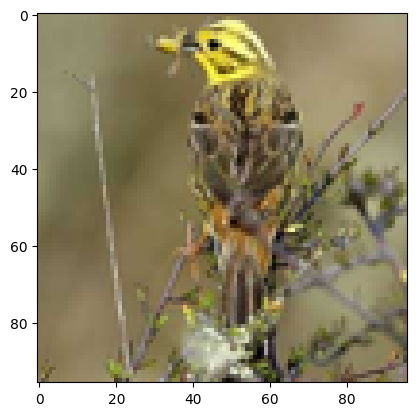

In [3]:
with open(TRAIN_DATA_PATH) as f:
  image = read_single_image(f)
  plot_image(image)

In [4]:
def read_labels(path_to_labels):

    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

def read_all_images(path_to_data):

    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)

        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def save_images(images, labels, types):
    i = 0
    for image in tqdm(images, position=0):
        label = labels[i] 
        directory = DATA_DIR + '/' + types + '/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        #print(filename)
        save_image(image, filename)
        i = i+1
        
def save_unlabelled_images(images):
    i = 0
    for image in tqdm(images, position=0):
        directory = DATA_DIR + '/' + 'unlabelled' + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        save_image(image, filename)
        i = i+1 
        

def create_val_dataset():
    train_image_path = DATA_DIR + "train"
    folders = os.listdir(train_image_path)

    for folder in tqdm(folders, position=0):
        temp_dir = DATA_DIR +"/train/" + folder
        temp_image_list = os.listdir(temp_dir)

    for i in range(50):
        val_dir = DATA_DIR + "/val/" + folder
        try:
            os.makedirs(val_dir, exist_ok=True)
        except OSError as exc:

            if exc.errno == errno.EEXIST:
                pass
        image_name = random.choice(temp_image_list)
        temp_image_list.remove(image_name)
        old_name = temp_dir + '/' + image_name
        new_name = val_dir + '/' + image_name
        os.replace(old_name, new_name)

In [5]:
train_labels = read_labels(TRAIN_LABEL_PATH)
train_images = read_all_images(TRAIN_DATA_PATH)

test_labels = read_labels(TEST_LABEL_PATH)
test_images = read_all_images(TEST_DATA_PATH)

unlabelled_images = read_all_images(UNLAB_DATA_PATH)

In [10]:
save_images(train_images, train_labels, "train")
save_images(test_images, test_labels, "test")
save_unlabelled_images(unlabelled_images)

100%|██████████| 100000/100000 [07:33<00:00, 220.31it/s]
